# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | fortaleza
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | usogorsk
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | posto fiscal rolim de moura
Processing Record 7 of Set 1 | novyy urengoy
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | necochea
Processing Record 14 of Set 1 | mossendjo
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | jiagedaqi
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | balsas
Processing Record 20 of Set 1 | ariquemes
Processing Record 21 of Set 1 | mount isa
Processing Rec

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,0.52,41,87,0.89,US,1738787567
1,fortaleza,-3.7227,-38.5247,28.07,78,75,4.63,BR,1738787568
2,adamstown,-25.0660,-130.1015,25.23,78,4,6.10,PN,1738787569
3,usogorsk,63.4106,48.6872,-13.39,100,94,1.94,RU,1738787570
4,grytviken,-54.2811,-36.5092,1.80,94,99,7.01,GS,1738787571


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,0.52,41,87,0.89,US,1738787567
1,fortaleza,-3.7227,-38.5247,28.07,78,75,4.63,BR,1738787568
2,adamstown,-25.0660,-130.1015,25.23,78,4,6.10,PN,1738787569
3,usogorsk,63.4106,48.6872,-13.39,100,94,1.94,RU,1738787570
4,grytviken,-54.2811,-36.5092,1.80,94,99,7.01,GS,1738787571


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

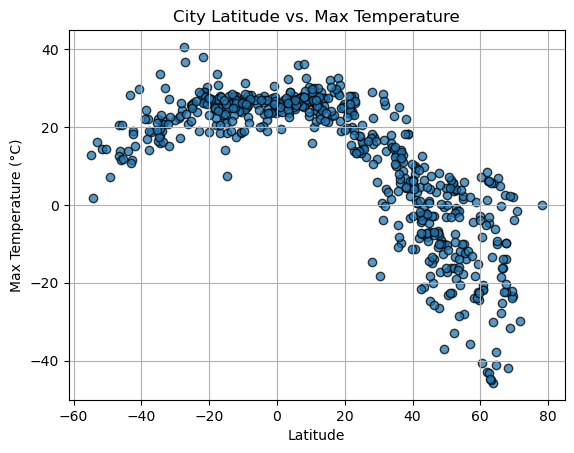

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

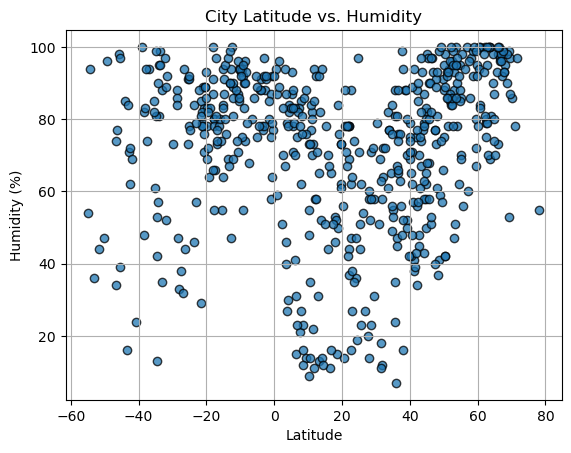

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

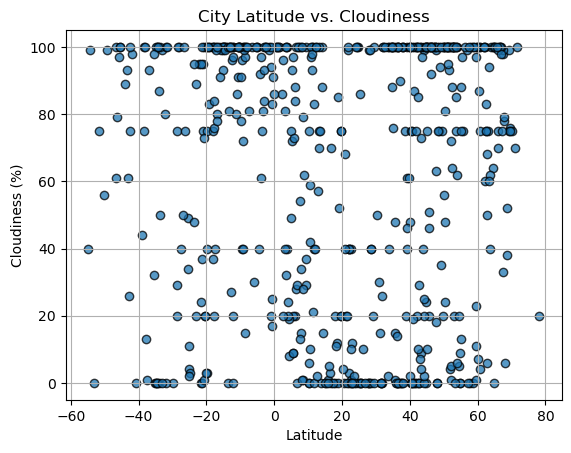

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

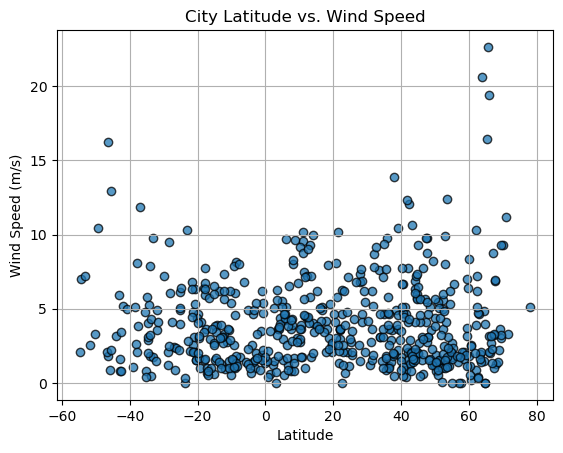

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
    regression_values = slope * x_values + intercept
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values, alpha=0.75)
    plt.plot(x_values, regression_values, color="red")
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", 
                 xy=(x_values.min(), regression_values.min()), 
                  color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
    

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,0.52,41,87,0.89,US,1738787567
3,usogorsk,63.4106,48.6872,-13.39,100,94,1.94,RU,1738787570
6,novyy urengoy,66.0833,76.6333,-18.53,98,75,3.14,RU,1738787574
7,isafjordur,66.0755,-23.1240,-0.21,73,70,19.38,IS,1738787575
9,st. john's,47.5649,-52.7093,-6.68,77,100,9.77,CA,1738787577


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fortaleza,-3.7227,-38.5247,28.07,78,75,4.63,BR,1738787568
2,adamstown,-25.0660,-130.1015,25.23,78,4,6.10,PN,1738787569
4,grytviken,-54.2811,-36.5092,1.80,94,99,7.01,GS,1738787571
5,posto fiscal rolim de moura,-13.0833,-62.2667,27.08,90,100,1.27,BR,1738787572
8,puerto natales,-51.7236,-72.4875,14.25,44,75,2.57,CL,1738787576


###  Temperature vs. Latitude Linear Regression Plot

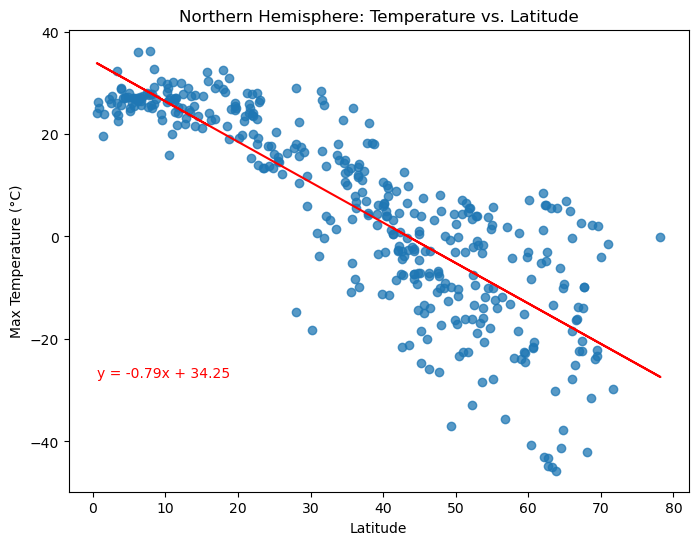

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       xlabel="Latitude", 
                       ylabel="Max Temperature (°C)", 
                       title="Northern Hemisphere: Temperature vs. Latitude")

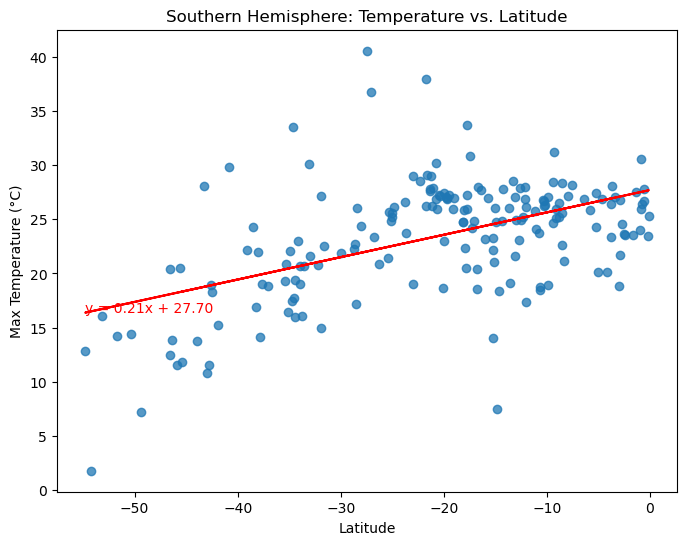

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       xlabel="Latitude", 
                       ylabel="Max Temperature (°C)", 
                       title="Southern Hemisphere: Temperature vs. Latitude")

**Discussion about the linear relationship:
The linear regression analysis reveals how seasonal changes affect temperature trends in both hemispheres. In the Northern Hemisphere, temperatures drop as latitude increases, particularly during the winter months when it's tilted away from the sun. Conversely, the Southern Hemisphere shows a rise in temperature with decreasing latitude, reflecting its summer season. The steeper slope in the Northern Hemisphere indicates a more significant temperature decrease with latitude, while the Southern Hemisphere’s gentler slope highlights a more moderate change. These differences underscore the impact of geography and axial tilt on global temperature patterns.

### Humidity vs. Latitude Linear Regression Plot

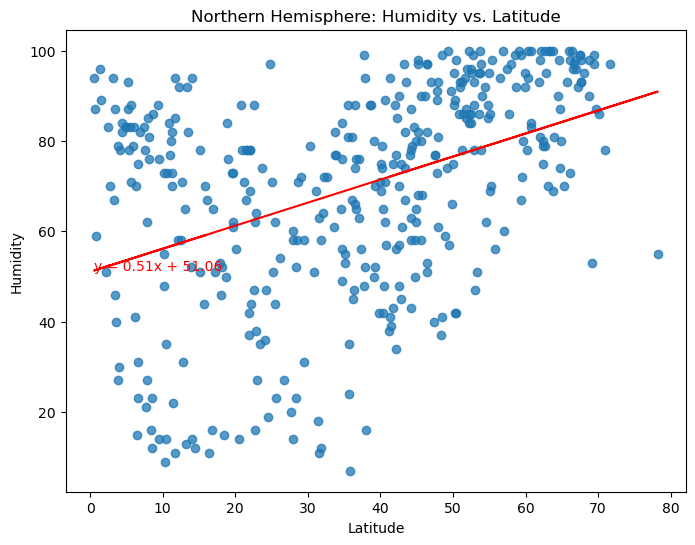

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                       xlabel="Latitude", 
                       ylabel="Humidity", 
                       title="Northern Hemisphere: Humidity vs. Latitude")

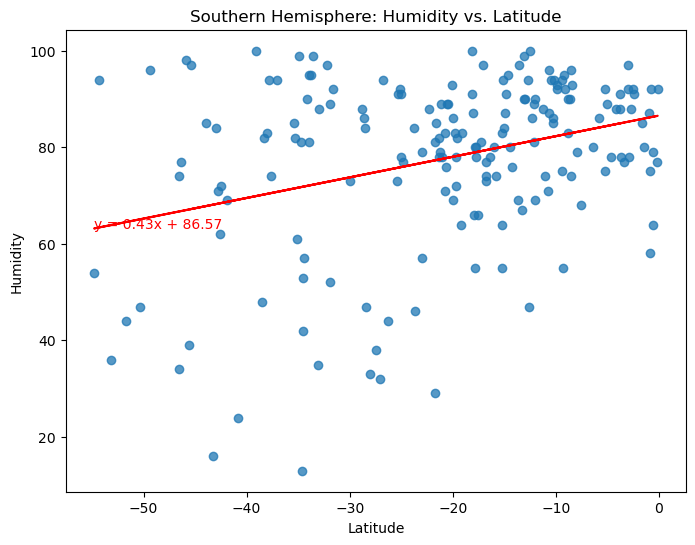

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                       xlabel="Latitude", 
                       ylabel="Humidity", 
                       title="Southern Hemisphere: Humidity vs. Latitude")

**Discussion about the linear relationship:
The linear regression analysis for humidity vs. latitude in both hemispheres reveals a positive correlation, with humidity increasing as latitude rises. In the Northern Hemisphere, the slope is steeper, indicating a stronger relationship between latitude and humidity compared to the Southern Hemisphere. This difference in slope is likely influenced by seasonal tilt, where the Northern Hemisphere experiences more pronounced changes during certain months. While both hemispheres show positive trends, the Northern Hemisphere's sharper increase in humidity with latitude reflects its more dramatic seasonal shifts. Overall, both regions demonstrate that latitude plays a key role in humidity patterns, but with varying intensities.

### Cloudiness vs. Latitude Linear Regression Plot

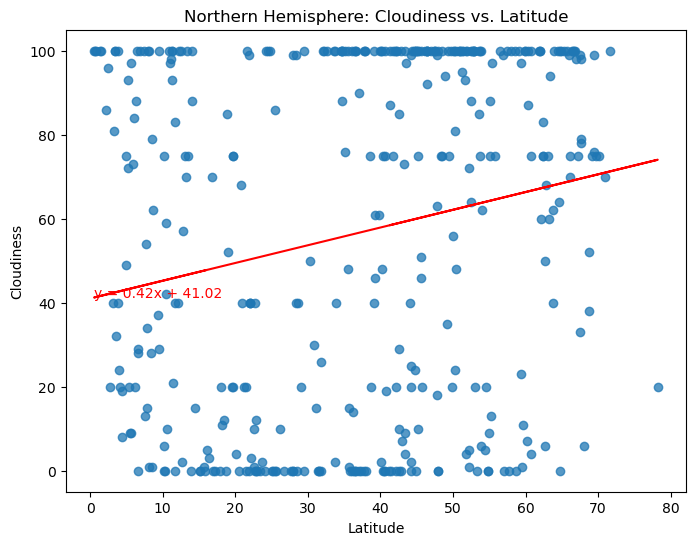

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       xlabel="Latitude", 
                       ylabel="Cloudiness", 
                       title="Northern Hemisphere: Cloudiness vs. Latitude")

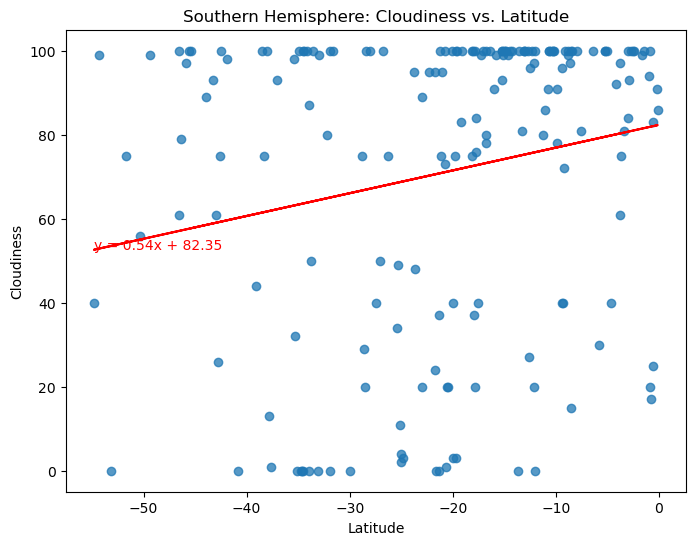

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       xlabel="Latitude", 
                       ylabel="Cloudiness", 
                       title="Southern Hemisphere: Cloudiness vs. Latitude")

**Discussion about the linear relationship:The positive linear regression trend between latitude and cloudiness shows a steeper slope in the Southern Hemisphere, indicating a stronger increase in cloud cover with latitude compared to the Northern Hemisphere. This may be due to the Southern Hemisphere's vast ocean coverage, which promotes consistent moisture availability and cloud formation.

### Wind Speed vs. Latitude Linear Regression Plot

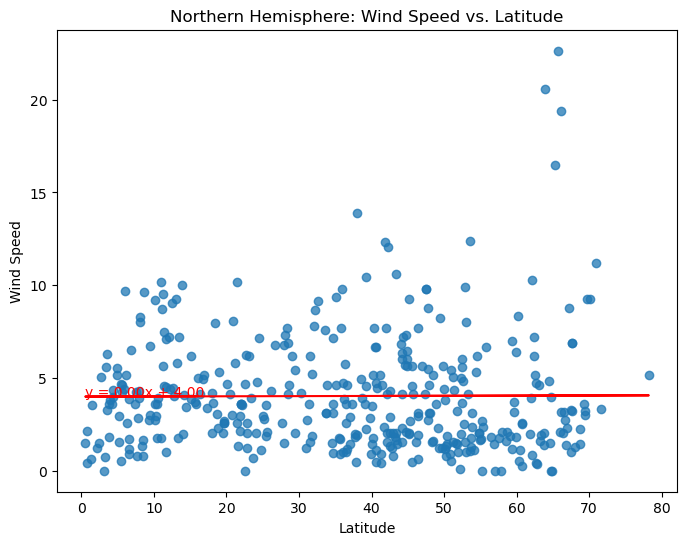

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                       xlabel="Latitude", 
                       ylabel="Wind Speed", 
                       title="Northern Hemisphere: Wind Speed vs. Latitude")

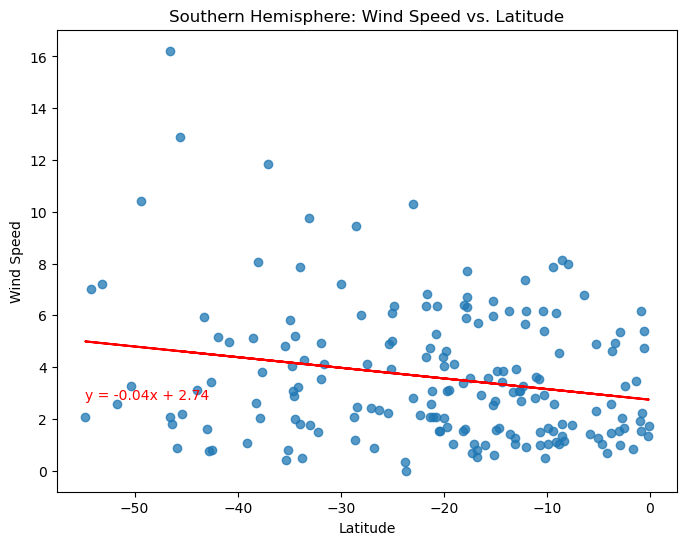

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                       xlabel="Latitude", 
                       ylabel="Wind Speed", 
                       title="Southern Hemisphere: Wind Speed vs. Latitude")

**Discussion about the linear relationship:
The relationship between wind speed and latitude shows opposite trends in each hemisphere. In the Northern Hemisphere, wind speed tends to increase with latitude, resulting in a positive regression, while in the Southern Hemisphere, wind speed decreases as latitude increases, creating a negative regression. This contrast is influenced by global wind patterns, such as the jet streams and trade winds, which behave differently
